In [1]:
import openpathsampling as paths
from openpathsampling.visualize import PathTreeBuilder
from IPython.display import SVG

In [2]:
st = paths.storage.Storage('trajectory.nc', mode='r')

In [3]:
psi = st.cvs[0]
print psi.name
print [ cv.name for cv in st.cvs ]

psi
[u'psi', u'phi', u'StateA', u'StateB', u'StateX']


In [9]:
tree = PathTreeBuilder(st)
tree.rejected = True
tree.states = {'orange' : st.cvs['StateA'], 'black' : st.cvs['StateX'] }
# Some ideas for collectivevariables to visualize
tree.op = lambda snap : 'B' if snap.reversed else 'F'
tree.op = st.configurations.op_idx
tree.from_samples(tree.construct_heritage(st, st.samples[len(st.samples) - 2]))

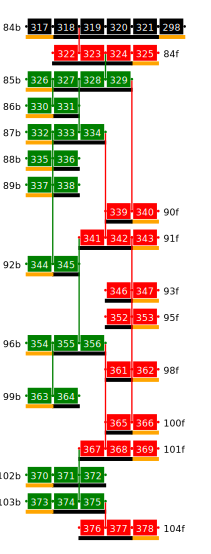

In [10]:
view = tree.renderer
view.zoom = 1.1
view.scale_y = 24
view.scale_x = 24
view.font_size = 0.35
SVG(view.to_svg())

In [8]:
cvA = st.cvs['StateA']
cvB = st.cvs['StateB']
cvX = st.cvs['StateX']